# Custom Learning Components in Keras

This notebook demonstrates advanced Keras deep learning constructs, focusing on custom learning components. We'll implement custom learning rate schedulers, dropout techniques, normalization layers, and integrate TensorBoard for visualization. These techniques give you precise control over the training process and model architecture.

## 1. Custom Learning Rate Scheduler

Learning rate scheduling is a powerful technique to improve neural network training. The One-Cycle policy, introduced by Leslie Smith, allows the learning rate to first increase linearly to a maximum value and then decrease with a cosine annealing schedule. This often leads to faster convergence and better performance.

Epoch 1/8
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 25.4997 - mae: 4.0351 - val_loss: 13.0838 - val_mae: 2.8860 - learning_rate: 0.0010
Epoch 2/8
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 19.9491 - mae: 3.5609 - val_loss: 15.5239 - val_mae: 3.1704 - learning_rate: 0.0010
Epoch 3/8
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12.5652 - mae: 2.8149 - val_loss: 19.4326 - val_mae: 3.5516 - learning_rate: 5.0000e-04
Epoch 4/8
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.3212 - mae: 2.1239 - val_loss: 26.2591 - val_mae: 4.1709 - learning_rate: 5.0000e-04
Epoch 5/8
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.5168 - mae: 1.4464 - val_loss: 30.2312 - val_mae: 4.4859 - learning_rate: 2.5000e-04
Epoch 6/8
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.1832 - mae: 1.1231 - val_loss: 33.9329 - val_mae: 4.7520 - learning_rate: 2.5000e-04
Epoch 7/8
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.4371 - mae: 0.9045 - val_loss: 35.5053 - val_mae: 4.8593 - learning_rate: 1.2500e

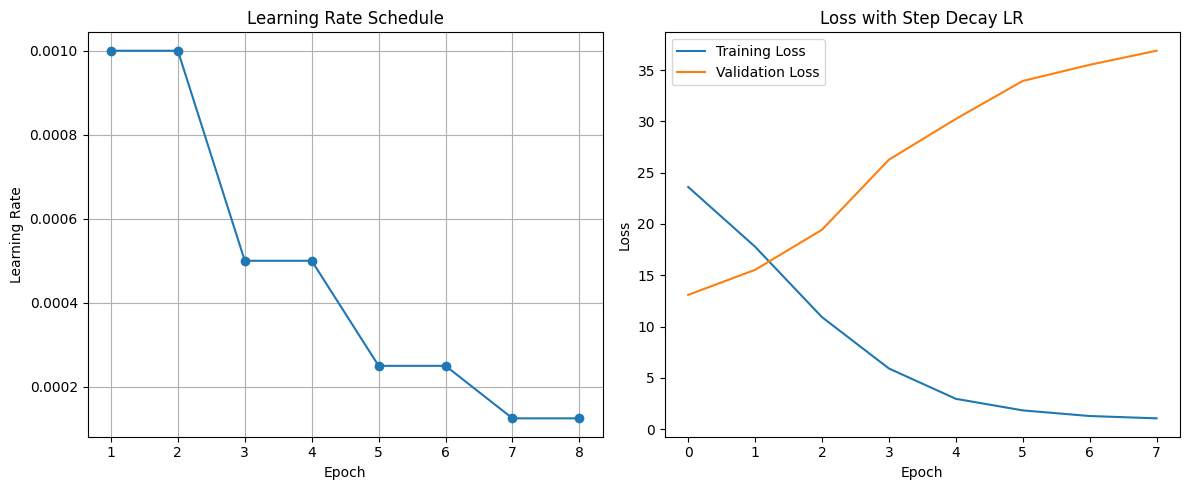

Epoch 1/8
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 25.1021 - mae: 4.0050 - val_loss: 12.6454 - val_mae: 2.8408 - learning_rate: 0.0010
Epoch 2/8
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 20.1580 - mae: 3.5903 - val_loss: 14.5254 - val_mae: 3.0820 - learning_rate: 9.6575e-04
Epoch 3/8
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12.9060 - mae: 2.8412 - val_loss: 21.2522 - val_mae: 3.7545 - learning_rate: 8.6820e-04
Epoch 4/8
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.2239 - mae: 1.7576 - val_loss: 31.8564 - val_mae: 4.5965 - learning_rate: 7.2221e-04
Epoch 5/8
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.7180 - mae: 0.9990 - val_loss: 37.9168 - val_mae: 5.0143 - learning_rate: 5.5000e-04
Epoch 6/8
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9687 - mae: 0.7604 - val_loss: 39.5824 - val_mae: 5.1126 - learning_rate: 3.7779e-04
Epoch 7/8
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7940 - mae: 0.6948 - val_loss: 40.0483 - val_mae: 5.1378 - learning_rate: 2.3

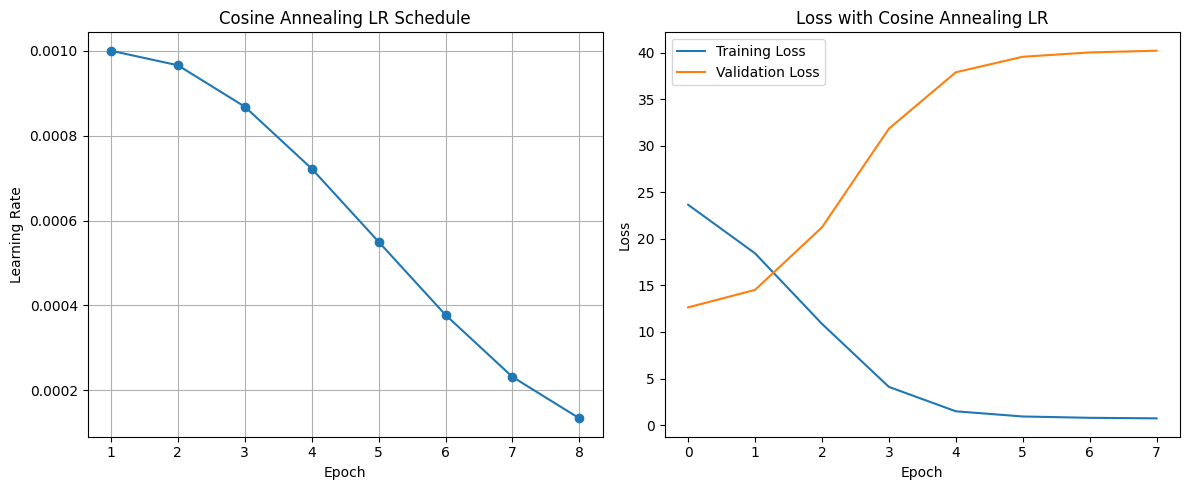

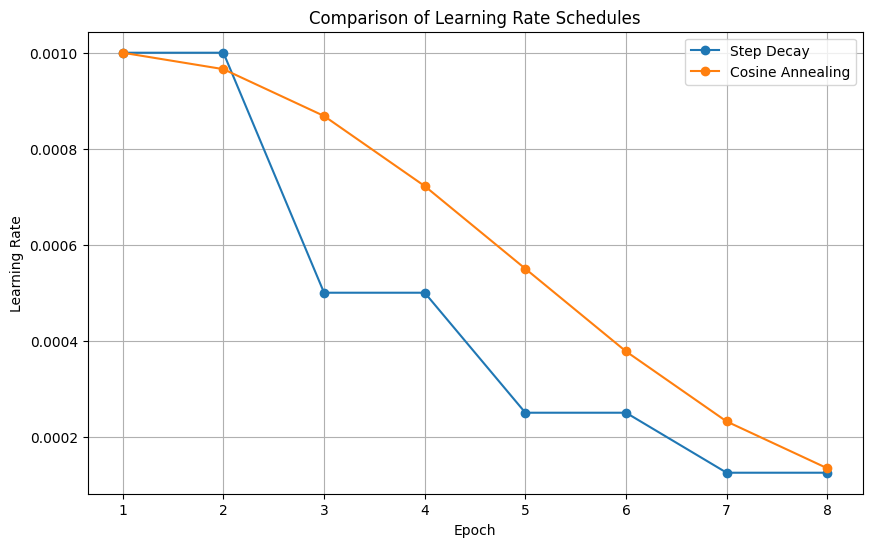

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import math

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Create a simple dataset for demonstration
def generate_data(n_samples=1000):
    X = np.random.randn(n_samples, 20)
    w = np.random.randn(20, 1)
    y = X.dot(w) + np.random.randn(n_samples, 1) * 0.1
    return X, y.reshape(-1)

X_train, y_train = generate_data(1000)
X_val, y_val = generate_data(200)

# Create a LearningRateScheduler using Keras built-in callback
def step_decay(epoch):
    """Step decay function"""
    initial_lr = 0.001
    drop_rate = 0.5
    epochs_drop = 2
    lr = initial_lr * math.pow(drop_rate, math.floor(epoch/epochs_drop))
    return lr

# Create the callback
lr_scheduler = keras.callbacks.LearningRateScheduler(step_decay)

# Build and compile model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(20,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

# Train the model with the built-in LR scheduler
history = model.fit(
    X_train, y_train,
    epochs=8,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[lr_scheduler],
    verbose=1
)

# Get the learning rates from the history
epochs = range(1, 9)
learning_rates = [step_decay(epoch-1) for epoch in epochs]

# Plot learning rate schedule
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, learning_rates, 'o-')
plt.title('Learning Rate Schedule')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss with Step Decay LR')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Now let's implement a custom cosine annealing scheduler
def cosine_decay(epoch, total_epochs=10, initial_lr=0.001, min_lr=0.0001):
    """Cosine annealing learning rate schedule"""
    return min_lr + 0.5 * (initial_lr - min_lr) * (1 + np.cos(np.pi * epoch / total_epochs))

# Create the cosine annealing scheduler
cosine_scheduler = keras.callbacks.LearningRateScheduler(
    lambda epoch: cosine_decay(epoch, total_epochs=8)
)

# Reset and retrain the model with cosine annealing
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(20,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

# Train with cosine annealing
history_cosine = model.fit(
    X_train, y_train,
    epochs=8,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[cosine_scheduler],
    verbose=1
)

# Get cosine learning rates
cosine_learning_rates = [cosine_decay(epoch, total_epochs=8) for epoch in range(8)]

# Plot cosine learning rate schedule
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, cosine_learning_rates, 'o-')
plt.title('Cosine Annealing LR Schedule')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_cosine.history['loss'], label='Training Loss')
plt.plot(history_cosine.history['val_loss'], label='Validation Loss')
plt.title('Loss with Cosine Annealing LR')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Compare both learning rate schedules
plt.figure(figsize=(10, 6))
plt.plot(epochs, learning_rates, 'o-', label='Step Decay')
plt.plot(epochs, cosine_learning_rates, 'o-', label='Cosine Annealing')
plt.title('Comparison of Learning Rate Schedules')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.legend()
plt.grid(True)
plt.show()

## 2. Custom Dropout Implementation

Dropout is a regularization technique that randomly sets a fraction of input units to zero during training to prevent overfitting. Here we'll implement a custom Monte Carlo dropout layer that remains active during inference, allowing us to estimate model uncertainty.

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


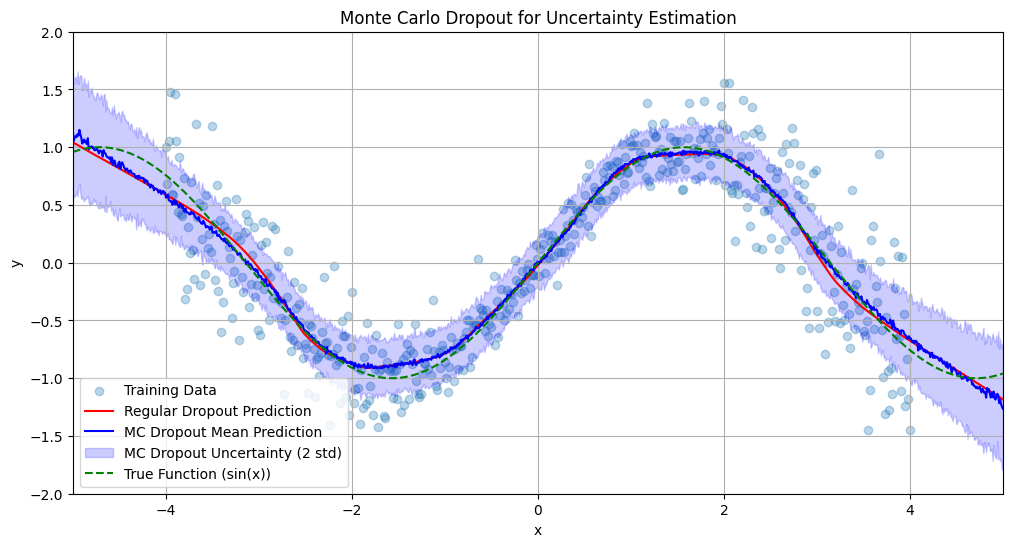

Regular dropout model - single prediction, no uncertainty estimate
MC dropout model - 100 predictions to estimate uncertainty
Higher uncertainty in regions with:
  1. More noisy training data (noise increases with |x|)
  2. No training data (x < -4 or x > 4)


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow.keras.backend as K

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Create a dataset with noise to demonstrate uncertainty
def generate_noisy_data(n_samples=1000):
    # Generate x values between -4 and 4
    X = np.linspace(-4, 4, n_samples).reshape(-1, 1)

    # Generate y values using sin function with increasing noise
    noise_level = 0.1 + 0.1 * np.abs(X.reshape(-1))
    y = np.sin(X.reshape(-1)) + np.random.normal(0, noise_level)

    return X, y

X_train, y_train = generate_noisy_data(500)
X_test = np.linspace(-5, 5, 1000).reshape(-1, 1)  # Extend test range beyond training

# Create a custom MC Dropout layer that remains active during inference
class MCDropout(layers.Dropout):
    def __init__(self, rate):
        super(MCDropout, self).__init__(rate)
        self.rate = rate

    def call(self, inputs, training=None):
        # Always apply dropout, even during inference
        return super().call(inputs, training=True)

# Create a model with regular dropout
model_regular = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(1,)),
    layers.Dropout(0.3),  # Regular dropout - inactive during inference
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1)
])

# Create a model with MC dropout
model_mc = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(1,)),
    MCDropout(0.3),  # MC dropout - stays active during inference
    layers.Dense(128, activation='relu'),
    MCDropout(0.3),
    layers.Dense(1)
])

# Compile both models
model_regular.compile(optimizer='adam', loss='mse')
model_mc.compile(optimizer='adam', loss='mse')

# Train both models
model_regular.fit(X_train, y_train, epochs=100, verbose=0)
model_mc.fit(X_train, y_train, epochs=100, verbose=0)

# Make predictions with regular model
y_pred_regular = model_regular.predict(X_test)

# Make multiple predictions with MC dropout model to estimate uncertainty
n_predictions = 100
mc_predictions = np.zeros((n_predictions, len(X_test)))

for i in range(n_predictions):
    mc_predictions[i, :] = model_mc.predict(X_test, verbose=0).flatten()

# Calculate mean and standard deviation of MC predictions
y_pred_mc_mean = np.mean(mc_predictions, axis=0)
y_pred_mc_std = np.std(mc_predictions, axis=0)

# Visualize the results
plt.figure(figsize=(12, 6))

# Plot training data
plt.scatter(X_train, y_train, alpha=0.3, label='Training Data')

# Plot regular model prediction
plt.plot(X_test, y_pred_regular, 'r-', label='Regular Dropout Prediction')

# Plot MC dropout model prediction with uncertainty
plt.plot(X_test, y_pred_mc_mean, 'b-', label='MC Dropout Mean Prediction')
plt.fill_between(X_test.flatten(),
                 y_pred_mc_mean - 2 * y_pred_mc_std,
                 y_pred_mc_mean + 2 * y_pred_mc_std,
                 alpha=0.2, color='b', label='MC Dropout Uncertainty (2 std)')

# Add ground truth function
X_true = np.linspace(-5, 5, 1000)
y_true = np.sin(X_true)
plt.plot(X_true, y_true, 'g--', label='True Function (sin(x))')

plt.title('Monte Carlo Dropout for Uncertainty Estimation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

# Zoom in to see detail
plt.xlim(-5, 5)
plt.ylim(-2, 2)

plt.show()

# Display prediction stats
print(f"Regular dropout model - single prediction, no uncertainty estimate")
print(f"MC dropout model - {n_predictions} predictions to estimate uncertainty")
print(f"Higher uncertainty in regions with:")
print(f"  1. More noisy training data (noise increases with |x|)")
print(f"  2. No training data (x < -4 or x > 4)")

## 3. Custom Normalization Layer

Normalization layers help stabilize and accelerate neural network training by normalizing activations. Here we'll implement a custom normalization layer similar to Layer Normalization, which normalizes activations across the feature dimension for each training example individually.

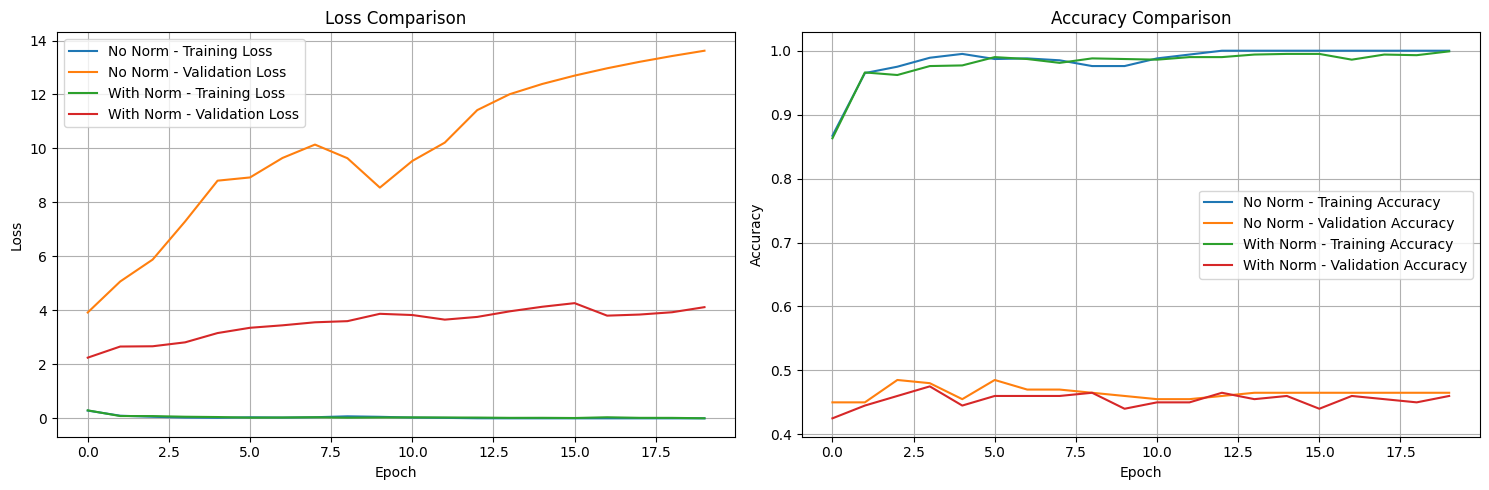

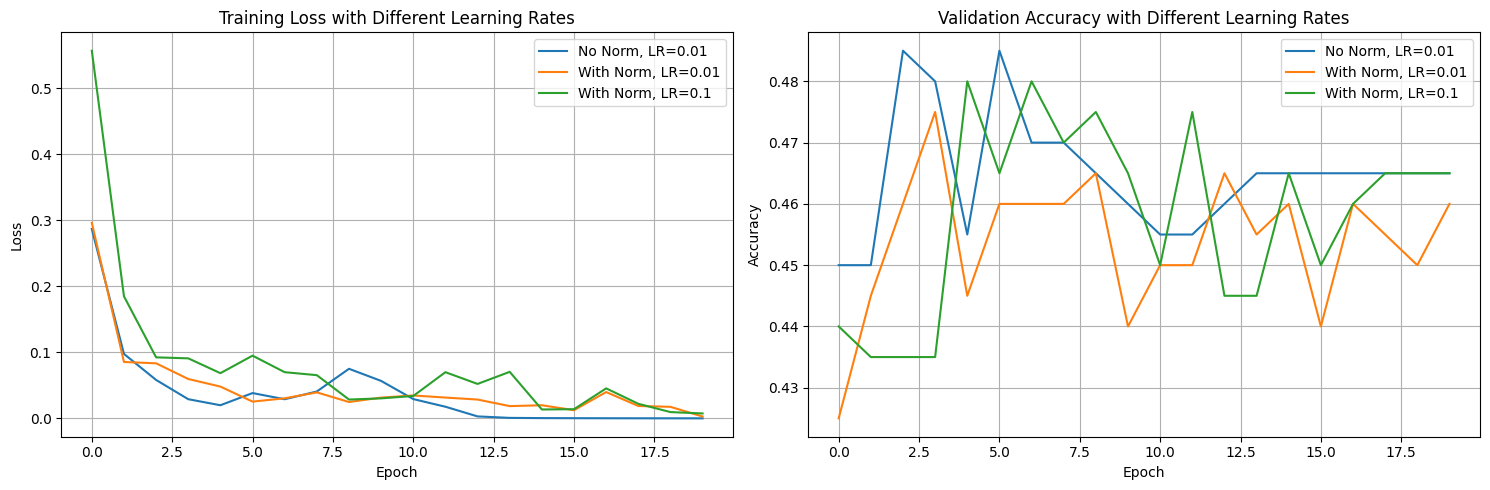

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow.keras.backend as K

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Create a dataset
def generate_data(n_samples=1000):
    X = np.random.randn(n_samples, 20)
    w = np.random.randn(20, 1)
    y = X.dot(w) + np.random.randn(n_samples, 1) * 0.1
    y = (y > 0).astype(np.float32)  # Binary classification task
    return X, y.reshape(-1)

X_train, y_train = generate_data(1000)
X_val, y_val = generate_data(200)

# Custom Layer Normalization
class CustomLayerNorm(layers.Layer):
    def __init__(self, epsilon=1e-3):
        super(CustomLayerNorm, self).__init__()
        self.epsilon = epsilon

    def build(self, input_shape):
        # Add trainable scale and shift parameters
        shape = input_shape[-1:]
        self.gamma = self.add_weight(
            name='gamma',
            shape=shape,
            initializer='ones',
            trainable=True
        )
        self.beta = self.add_weight(
            name='beta',
            shape=shape,
            initializer='zeros',
            trainable=True
        )
        super(CustomLayerNorm, self).build(input_shape)

    def call(self, inputs):
        # Calculate mean and variance along the last axis
        mean = K.mean(inputs, axis=-1, keepdims=True)
        variance = K.var(inputs, axis=-1, keepdims=True)

        # Normalize
        normalized = (inputs - mean) / K.sqrt(variance + self.epsilon)

        # Scale and shift
        outputs = self.gamma * normalized + self.beta

        return outputs

    def compute_output_shape(self, input_shape):
        return input_shape

# Create a model without normalization
model_no_norm = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(20,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Create a model with custom normalization
model_with_norm = keras.Sequential([
    layers.Dense(64, input_shape=(20,)),
    CustomLayerNorm(),
    layers.Activation('relu'),
    layers.Dense(32),
    CustomLayerNorm(),
    layers.Activation('relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile both models
model_no_norm.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.01),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model_with_norm.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.01),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train both models
history_no_norm = model_no_norm.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=0
)

history_with_norm = model_with_norm.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=0
)

# Plot training history comparison
plt.figure(figsize=(15, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history_no_norm.history['loss'], label='No Norm - Training Loss')
plt.plot(history_no_norm.history['val_loss'], label='No Norm - Validation Loss')
plt.plot(history_with_norm.history['loss'], label='With Norm - Training Loss')
plt.plot(history_with_norm.history['val_loss'], label='With Norm - Validation Loss')
plt.title('Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history_no_norm.history['accuracy'], label='No Norm - Training Accuracy')
plt.plot(history_no_norm.history['val_accuracy'], label='No Norm - Validation Accuracy')
plt.plot(history_with_norm.history['accuracy'], label='With Norm - Training Accuracy')
plt.plot(history_with_norm.history['val_accuracy'], label='With Norm - Validation Accuracy')
plt.title('Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Train a model with both custom normalization and higher learning rate to show stability
model_high_lr = keras.Sequential([
    layers.Dense(64, input_shape=(20,)),
    CustomLayerNorm(),
    layers.Activation('relu'),
    layers.Dense(32),
    CustomLayerNorm(),
    layers.Activation('relu'),
    layers.Dense(1, activation='sigmoid')
])

model_high_lr.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.1),  # 10x higher learning rate
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history_high_lr = model_high_lr.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=0
)

# Plot with high learning rate
plt.figure(figsize=(15, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history_no_norm.history['loss'], label='No Norm, LR=0.01')
plt.plot(history_with_norm.history['loss'], label='With Norm, LR=0.01')
plt.plot(history_high_lr.history['loss'], label='With Norm, LR=0.1')
plt.title('Training Loss with Different Learning Rates')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history_no_norm.history['val_accuracy'], label='No Norm, LR=0.01')
plt.plot(history_with_norm.history['val_accuracy'], label='With Norm, LR=0.01')
plt.plot(history_high_lr.history['val_accuracy'], label='With Norm, LR=0.1')
plt.title('Validation Accuracy with Different Learning Rates')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## 4. TensorBoard Integration

TensorBoard is a powerful visualization tool for TensorFlow that allows you to track and analyze your model's performance during training. This section demonstrates how to integrate TensorBoard with your Keras models to visualize metrics, model architecture, gradients, and more.

In [11]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import datetime
import os

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Create a dataset
def generate_data(n_samples=1000):
    X = np.random.randn(n_samples, 20)
    w = np.random.randn(20, 1)
    y = X.dot(w) + np.random.randn(n_samples, 1) * 0.1
    return X, y.reshape(-1)

X_train, y_train = generate_data(1000)
X_val, y_val = generate_data(200)

# Create a directory for TensorBoard logs
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(
    log_dir=log_dir,
    histogram_freq=1,  # Record histogram every 1 epoch
    profile_batch='500,520',  # Profile batches 500 to 520
    write_graph=True,  # Visualize model graph
    write_images=True  # Visualize model weights as images
)

# Create a model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(20,)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1)
])

# Compile the model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

# Create a learning rate scheduler for visualization
def scheduler(epoch, lr):
    if epoch < 5:
        return lr
    else:
        return lr * 0.9  # Decay by 10% after epoch 5

lr_callback = keras.callbacks.LearningRateScheduler(scheduler)

# Train the model with TensorBoard callback
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[tensorboard_callback, lr_callback],
    verbose=1
)

# Print instructions for launching TensorBoard
print("\nTo launch TensorBoard, run the following command in your terminal:")
print(f"tensorboard --logdir {log_dir}")
print("\nOr in a Jupyter notebook, run:")
print("%load_ext tensorboard")
print(f"%tensorboard --logdir {log_dir}")

# Let's also demonstrate how to log custom scalars to TensorBoard
file_writer = tf.summary.create_file_writer(log_dir + "/custom_metrics")

# Create a simple custom metric: ratio of training to validation loss
with file_writer.as_default():
    for epoch in range(10):
        train_loss = history.history['loss'][epoch]
        val_loss = history.history['val_loss'][epoch]
        ratio = train_loss / val_loss
        tf.summary.scalar('train_to_val_loss_ratio', ratio, step=epoch)

# Print summary of what's logged to TensorBoard
print("\nTensorBoard logs include:")
print("- Metrics: Loss and MAE for training and validation")
print("- Model graph: Visualization of the neural network architecture")
print("- Histograms: Distribution of weights and activations")
print("- Profiles: Performance profiling data (CPU/GPU usage, etc.)")
print("- Custom metrics: Train to validation loss ratio")
print("- Learning rate: Visualization of learning rate changes")

# Visualize the model architecture (text version for the notebook)
print("\nModel Architecture:")
model.summary()

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step - loss: 26.4987 - mae: 4.1102 - val_loss: 13.2438 - val_mae: 2.8974 - learning_rate: 0.0010
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 20.2409 - mae: 3.5961 - val_loss: 14.0303 - val_mae: 2.9900 - learning_rate: 0.0010
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 14.2979 - mae: 3.0178 - val_loss: 15.9283 - val_mae: 3.2132 - learning_rate: 0.0010
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 10.3741 - mae: 2.4679 - val_loss: 19.5989 - val_mae: 3.5508 - learning_rate: 0.0010
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 7.0574 - mae: 2.0229 - val_loss: 24.2861 - val_mae: 3.9517 - learning_rate: 0.0010
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 5.4366 - mae: 1.7969 - val_loss: 28.4392 - val_mae: 4.2729 - learning_rate: 9.0000e-04
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.9223 - mae: 1.7264 - val_loss: 30.6934 - val_mae: 4.4432 - learning_rate: 8.100

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                │ (None, 64)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,141 (43.52 KB)

 Trainable params: 3,649 (14.25 KB)

 Non-trainable params: 192 (768.00 B)

 Optimizer params: 7,300 (28.52 KB)

## 5. Custom Loss Function

Standard loss functions like MSE or cross-entropy work well for many problems, but custom loss functions can provide better results for specific tasks. Here, we'll implement a custom Huber loss function, which combines the benefits of MSE (mean squared error) for small errors and MAE (mean absolute error) for large errors, making it more robust to outliers.

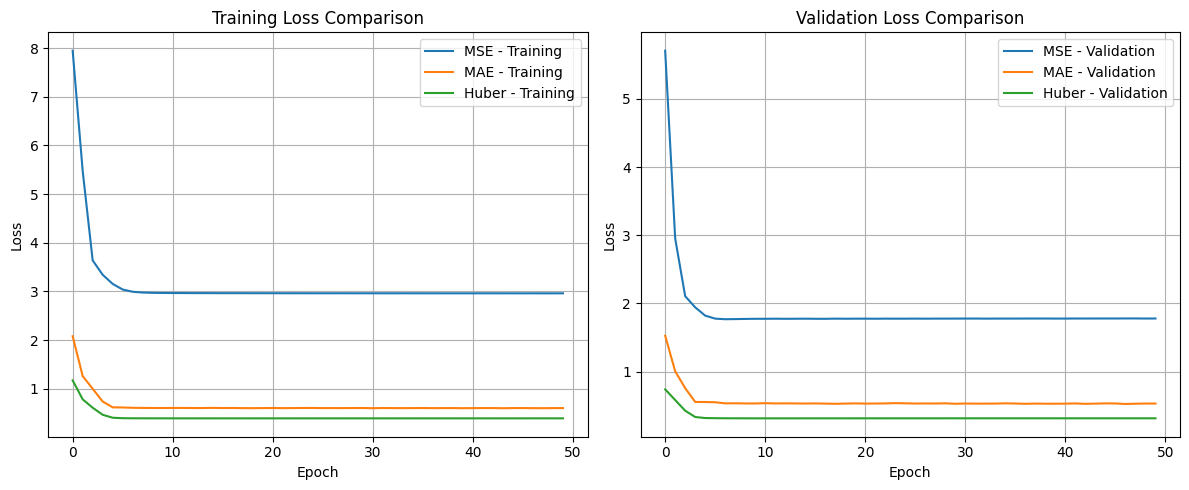

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


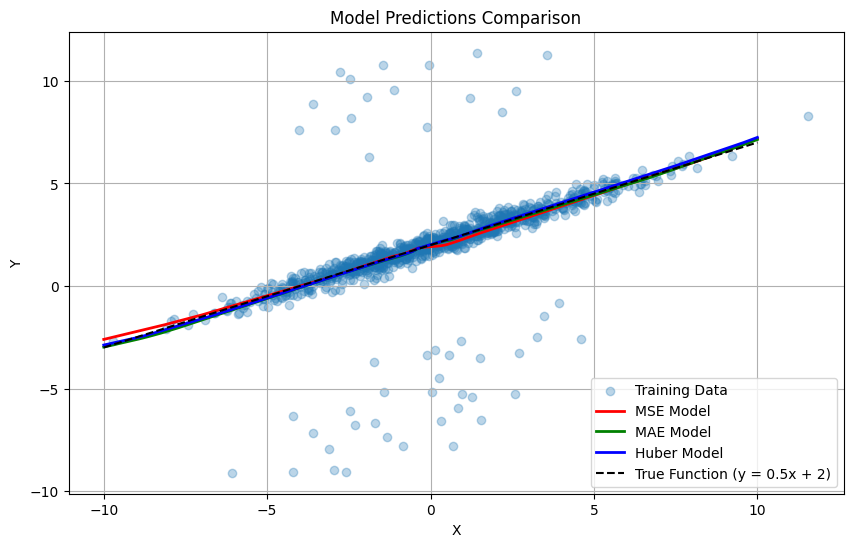

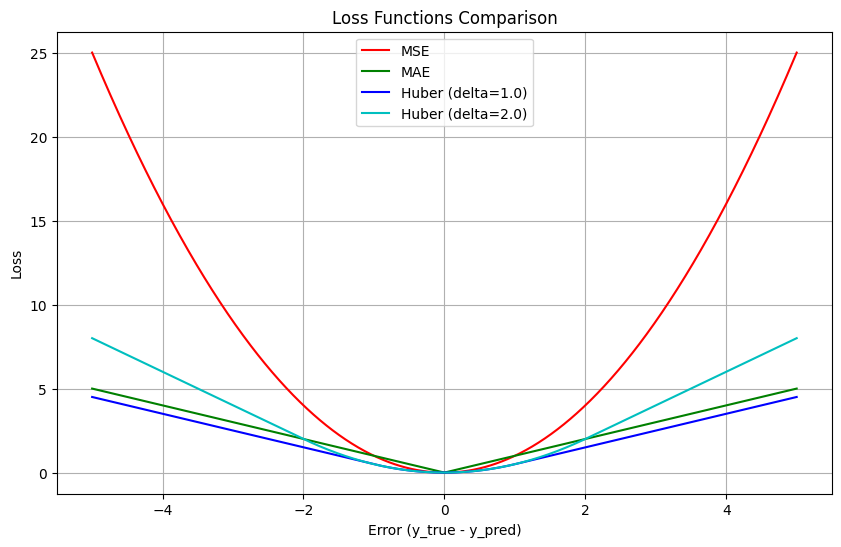

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow.keras.backend as K

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Create a dataset with outliers to demonstrate the robustness of Huber loss
def generate_data_with_outliers(n_samples=1000, outlier_ratio=0.05):
    X = np.random.randn(n_samples, 1) * 3

    # Generate true y values: y = 0.5*x + 2 + small noise
    y = 0.5 * X.reshape(-1) + 2 + np.random.randn(n_samples) * 0.3

    # Add outliers
    n_outliers = int(n_samples * outlier_ratio)
    outlier_indices = np.random.choice(n_samples, n_outliers, replace=False)
    y[outlier_indices] += np.random.choice([-1, 1], n_outliers) * np.random.uniform(5, 10, n_outliers)

    return X, y.reshape(-1, 1)

X_train, y_train = generate_data_with_outliers(1000)
X_val, y_val = generate_data_with_outliers(200)

# Define a custom Huber loss function
def huber_loss(y_true, y_pred, delta=1.0):
    """
    Huber loss: MSE when error < delta, MAE when error >= delta
    """
    error = y_true - y_pred
    is_small_error = tf.abs(error) <= delta
    small_error_loss = 0.5 * tf.square(error)
    large_error_loss = delta * (tf.abs(error) - 0.5 * delta)

    return tf.where(is_small_error, small_error_loss, large_error_loss)

# Create a custom loss class that inherits from keras.losses.Loss
class HuberLoss(keras.losses.Loss):
    def __init__(self, delta=1.0, **kwargs):
        super().__init__(**kwargs)
        self.delta = delta

    def call(self, y_true, y_pred):
        return huber_loss(y_true, y_pred, self.delta)

    def get_config(self):
        config = super().get_config()
        config.update({"delta": self.delta})
        return config

# Create three identical models with different loss functions for comparison
def create_model(loss):
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(1,)),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)
    ])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss=loss)
    return model

# Create models with MSE, MAE, and Huber loss
model_mse = create_model('mse')
model_mae = create_model('mae')
model_huber = create_model(HuberLoss(delta=1.0))

# Train all three models
history_mse = model_mse.fit(X_train, y_train, epochs=50, verbose=0, validation_data=(X_val, y_val))
history_mae = model_mae.fit(X_train, y_train, epochs=50, verbose=0, validation_data=(X_val, y_val))
history_huber = model_huber.fit(X_train, y_train, epochs=50, verbose=0, validation_data=(X_val, y_val))

# Plot the training and validation loss for each model
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_mse.history['loss'], label='MSE - Training')
plt.plot(history_mae.history['loss'], label='MAE - Training')
plt.plot(history_huber.history['loss'], label='Huber - Training')
plt.title('Training Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_mse.history['val_loss'], label='MSE - Validation')
plt.plot(history_mae.history['val_loss'], label='MAE - Validation')
plt.plot(history_huber.history['val_loss'], label='Huber - Validation')
plt.title('Validation Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Generate predictions for visualization
X_viz = np.linspace(-10, 10, 1000).reshape(-1, 1)
y_viz_mse = model_mse.predict(X_viz)
y_viz_mae = model_mae.predict(X_viz)
y_viz_huber = model_huber.predict(X_viz)

# Plot predictions against the data
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, alpha=0.3, label='Training Data')
plt.plot(X_viz, y_viz_mse, 'r-', linewidth=2, label='MSE Model')
plt.plot(X_viz, y_viz_mae, 'g-', linewidth=2, label='MAE Model')
plt.plot(X_viz, y_viz_huber, 'b-', linewidth=2, label='Huber Model')

# Plot the true function
X_true = np.linspace(-10, 10, 1000)
y_true = 0.5 * X_true + 2
plt.plot(X_true, y_true, 'k--', label='True Function (y = 0.5x + 2)')

plt.title('Model Predictions Comparison')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

# Plot the Huber loss function for different delta values
def huber_loss_numpy(error, delta):
    return np.where(np.abs(error) <= delta,
                   0.5 * np.square(error),
                   delta * (np.abs(error) - 0.5 * delta))

errors = np.linspace(-5, 5, 1000)
losses_mse = np.square(errors)
losses_mae = np.abs(errors)
losses_huber1 = huber_loss_numpy(errors, delta=1.0)
losses_huber2 = huber_loss_numpy(errors, delta=2.0)

plt.figure(figsize=(10, 6))
plt.plot(errors, losses_mse, 'r-', label='MSE')
plt.plot(errors, losses_mae, 'g-', label='MAE')
plt.plot(errors, losses_huber1, 'b-', label='Huber (delta=1.0)')
plt.plot(errors, losses_huber2, 'c-', label='Huber (delta=2.0)')
plt.title('Loss Functions Comparison')
plt.xlabel('Error (y_true - y_pred)')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

## 6. Custom Activation Function and Initializer

Activation functions introduce non-linearity into neural networks, enabling them to learn complex patterns. While Keras provides many standard activation functions (ReLU, sigmoid, tanh), custom activation functions can be beneficial for specific tasks. Here, we'll implement a custom Leaky ReLU activation and a custom weight initializer.

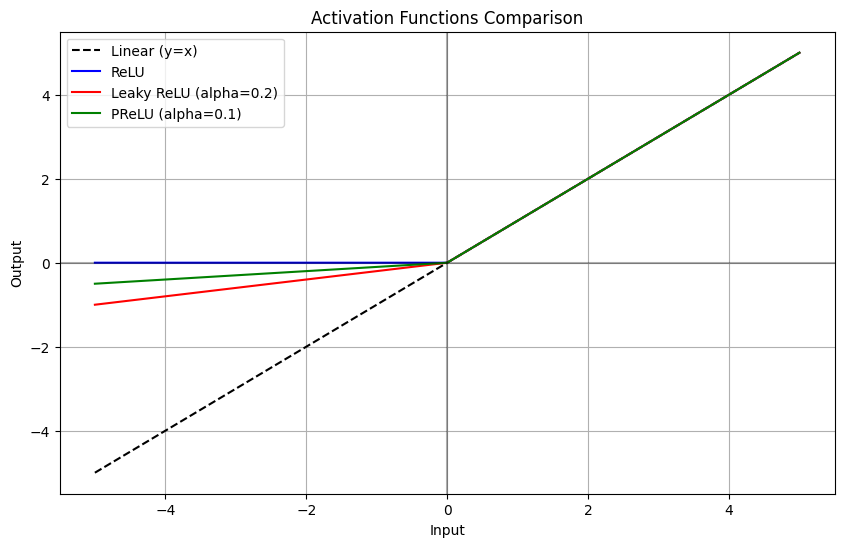

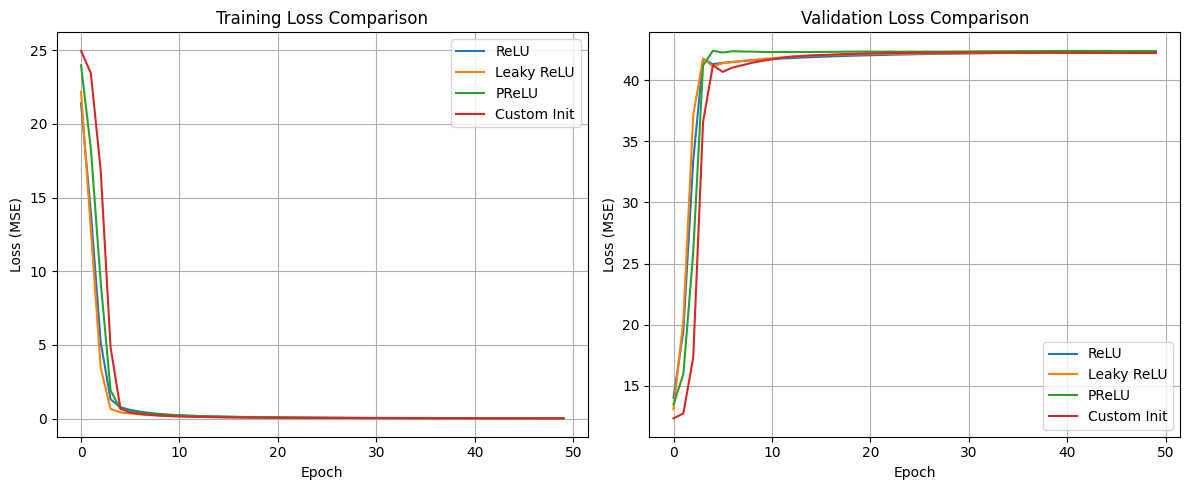

Learned alpha parameter in PReLU: 0.2075653225183487

Common Weight Initializers and Their Use Cases:
- Glorot/Xavier: Good for layers with sigmoid/tanh activation
- He: Good for layers with ReLU activation
- RandomNormal/Uniform: Simple, but less optimal for deep networks
- Orthogonal: Preserves gradient flow in RNNs
- Identity: Useful for residual connections
- Zeros: For bias initialization
- Ones: For gates that should be initially open


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow.keras.backend as K

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Custom Activation Function - Parametric Leaky ReLU
class PReLU(keras.layers.Layer):
    def __init__(self, alpha_initializer='zeros', **kwargs):
        super(PReLU, self).__init__(**kwargs)
        self.alpha_initializer = keras.initializers.get(alpha_initializer)

    def build(self, input_shape):
        self.alpha = self.add_weight(
            shape=(1,),
            name='alpha',
            initializer=self.alpha_initializer,
            trainable=True
        )
        super(PReLU, self).build(input_shape)

    def call(self, inputs):
        return tf.maximum(0.0, inputs) + self.alpha * tf.minimum(0.0, inputs)

    def get_config(self):
        config = super(PReLU, self).get_config()
        config.update({
            'alpha_initializer': keras.initializers.serialize(self.alpha_initializer)
        })
        return config

# Create a dataset for testing
def generate_data(n_samples=1000):
    X = np.random.randn(n_samples, 20)
    w = np.random.randn(20, 1)
    y = X.dot(w) + np.random.randn(n_samples, 1) * 0.1
    return X, y.reshape(-1)

X_train, y_train = generate_data(1000)
X_val, y_val = generate_data(200)

# Plot activation functions for comparison
x = np.linspace(-5, 5, 1000)
relu = np.maximum(0, x)
leaky_relu = np.maximum(0.2 * x, x)
prelu_example = np.maximum(0, x) + 0.1 * np.minimum(0, x)

plt.figure(figsize=(10, 6))
plt.plot(x, x, 'k--', label='Linear (y=x)')
plt.plot(x, relu, 'b-', label='ReLU')
plt.plot(x, leaky_relu, 'r-', label='Leaky ReLU (alpha=0.2)')
plt.plot(x, prelu_example, 'g-', label='PReLU (alpha=0.1)')
plt.title('Activation Functions Comparison')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.grid(True)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.show()

# Create models with different activation functions
model_relu = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(20,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

model_leaky = keras.Sequential([
    layers.Dense(64, input_shape=(20,)),
    layers.LeakyReLU(alpha=0.2),
    layers.Dense(32),
    layers.LeakyReLU(alpha=0.2),
    layers.Dense(1)
])

model_prelu = keras.Sequential([
    layers.Dense(64, input_shape=(20,)),
    PReLU(),
    layers.Dense(32),
    PReLU(),
    layers.Dense(1)
])

# Create model with more standard initializers
model_custom_init = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(20,),
                kernel_initializer=keras.initializers.GlorotUniform(seed=42)),
    layers.Dense(32, activation='relu',
                kernel_initializer=keras.initializers.HeUniform(seed=42)),
    layers.Dense(1, kernel_initializer=keras.initializers.RandomNormal(stddev=0.01, seed=42))
])

# Compile all models
for model in [model_relu, model_leaky, model_prelu, model_custom_init]:
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss='mse',
        metrics=['mae']
    )

# Train all models
history_relu = model_relu.fit(
    X_train, y_train, epochs=50, verbose=0, validation_data=(X_val, y_val))

history_leaky = model_leaky.fit(
    X_train, y_train, epochs=50, verbose=0, validation_data=(X_val, y_val))

history_prelu = model_prelu.fit(
    X_train, y_train, epochs=50, verbose=0, validation_data=(X_val, y_val))

history_custom_init = model_custom_init.fit(
    X_train, y_train, epochs=50, verbose=0, validation_data=(X_val, y_val))

# Compare training histories
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_relu.history['loss'], label='ReLU')
plt.plot(history_leaky.history['loss'], label='Leaky ReLU')
plt.plot(history_prelu.history['loss'], label='PReLU')
plt.plot(history_custom_init.history['loss'], label='Custom Init')
plt.title('Training Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_relu.history['val_loss'], label='ReLU')
plt.plot(history_leaky.history['val_loss'], label='Leaky ReLU')
plt.plot(history_prelu.history['val_loss'], label='PReLU')
plt.plot(history_custom_init.history['val_loss'], label='Custom Init')
plt.title('Validation Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Check the learned alpha parameter in PReLU
print(f"Learned alpha parameter in PReLU: {model_prelu.layers[1].get_weights()[0][0]}")

# Explain different initializers and their use cases
initializers_table = {
    'Glorot/Xavier': 'Good for layers with sigmoid/tanh activation',
    'He': 'Good for layers with ReLU activation',
    'RandomNormal/Uniform': 'Simple, but less optimal for deep networks',
    'Orthogonal': 'Preserves gradient flow in RNNs',
    'Identity': 'Useful for residual connections',
    'Zeros': 'For bias initialization',
    'Ones': 'For gates that should be initially open'
}

print("\nCommon Weight Initializers and Their Use Cases:")
for init, use_case in initializers_table.items():
    print(f"- {init}: {use_case}")

## 7. Custom Metrics

Custom metrics allow you to evaluate your model's performance using specific criteria beyond standard metrics like accuracy or mean absolute error. In this section, we'll implement a custom Huber metric that matches our Huber loss function and an R-squared metric for regression tasks.

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - huber_metric: 1.7210 - loss: 1.7207 - mae: 2.1845 - mse: 7.2756 - r_squared: -0.6312 - val_huber_metric: 1.1549 - val_loss: 1.2173 - val_mae: 1.6791 - val_mse: 3.9463 - val_r_squared: -0.0712
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - huber_metric: 1.0386 - loss: 1.0380 - mae: 1.4828 - mse: 4.1154 - r_squared: 0.0786 - val_huber_metric: 0.5642 - val_loss: 0.5993 - val_mae: 0.9853 - val_mse: 2.2704 - val_r_squared: 0.3837
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - huber_metric: 0.6372 - loss: 0.6365 - mae: 1.0179 - mse: 3.2275 - r_squared: 0.2786 - val_huber_metric: 0.4033 - val_loss: 0.4319 - val_mae: 0.7673 - val_mse: 1.9127 - val_r_squared: 0.4808
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - huber_metric: 0.4761 - loss: 0.4753 - mae: 0.7930 - mse: 2.8309 - r_squared: 0.3679 - val_huber_metric: 0.3083 - val_loss: 0.3392 - val_mae: 0.5971 - val_mse: 1.8072 - val_r_squared: 0.5095
Epoch 5/50
32/32 ━━━━━━━━━━━━

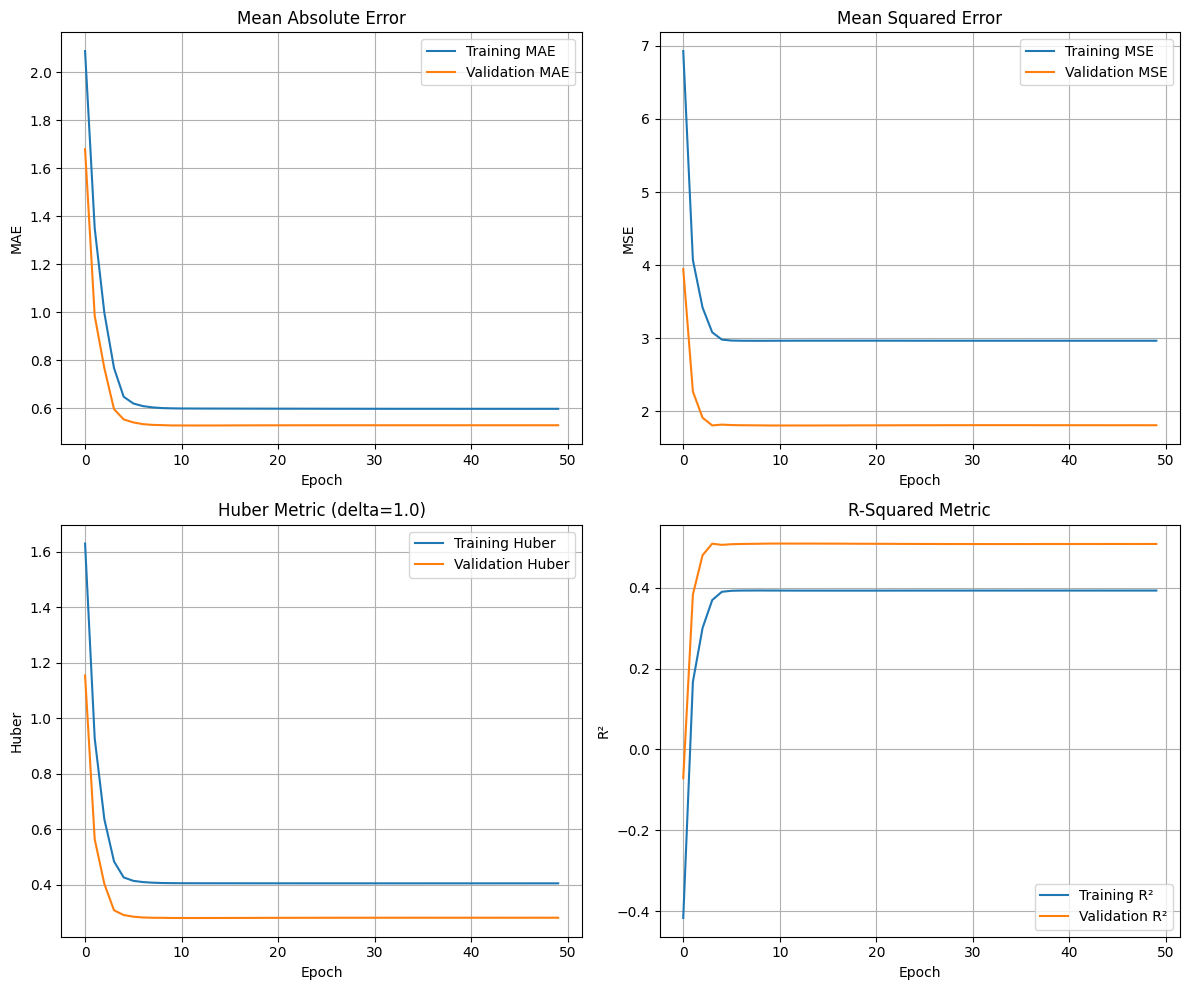

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Training R-squared: 0.4158
Validation R-squared: 0.5429
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


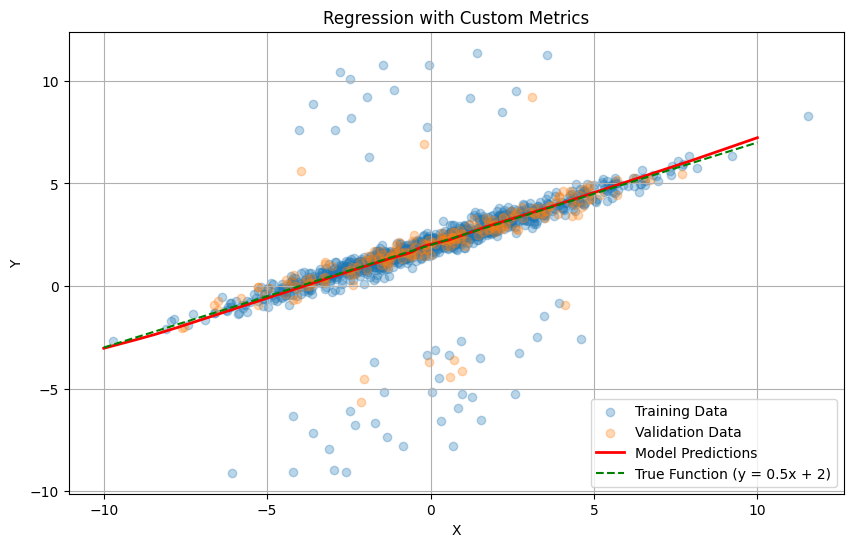

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow.keras.backend as K

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Create a dataset with outliers
def generate_regression_data(n_samples=1000, outlier_ratio=0.05):
    X = np.random.randn(n_samples, 1) * 3

    # Generate true y values: y = 0.5*x + 2 + small noise
    y = 0.5 * X.reshape(-1) + 2 + np.random.randn(n_samples) * 0.3

    # Add outliers
    n_outliers = int(n_samples * outlier_ratio)
    outlier_indices = np.random.choice(n_samples, n_outliers, replace=False)
    y[outlier_indices] += np.random.choice([-1, 1], n_outliers) * np.random.uniform(5, 10, n_outliers)

    return X, y.reshape(-1, 1)

X_train, y_train = generate_regression_data(1000)
X_val, y_val = generate_regression_data(200)

# Custom Huber Metric
class HuberMetric(keras.metrics.Metric):
    def __init__(self, delta=1.0, name='huber_metric', **kwargs):
        super(HuberMetric, self).__init__(name=name, **kwargs)
        self.delta = delta
        self.huber_fn = self.create_huber_fn()
        self.total = self.add_weight(name='total', initializer='zeros')
        self.count = self.add_weight(name='count', initializer='zeros')

    def create_huber_fn(self):
        def huber(y_true, y_pred):
            error = y_true - y_pred
            is_small_error = tf.abs(error) <= self.delta
            small_error_loss = 0.5 * tf.square(error)
            large_error_loss = self.delta * (tf.abs(error) - 0.5 * self.delta)
            return tf.where(is_small_error, small_error_loss, large_error_loss)
        return huber

    def update_state(self, y_true, y_pred, sample_weight=None):
        metric = self.huber_fn(y_true, y_pred)
        metric = tf.reduce_mean(metric)
        self.total.assign_add(metric)
        self.count.assign_add(1.0)

    def result(self):
        return self.total / self.count

    def reset_state(self):
        self.total.assign(0.0)
        self.count.assign(0.0)

# Custom R-Squared (Coefficient of Determination) Metric
class RSquared(keras.metrics.Metric):
    def __init__(self, name='r_squared', **kwargs):
        super(RSquared, self).__init__(name=name, **kwargs)
        self.sum_squared_residuals = self.add_weight(
            name='sum_squared_residuals', initializer='zeros')
        self.sum_squared_total = self.add_weight(
            name='sum_squared_total', initializer='zeros')

    def update_state(self, y_true, y_pred, sample_weight=None):
        # Sum of squared residuals (y_true - y_pred)^2
        squared_residuals = tf.square(y_true - y_pred)
        self.sum_squared_residuals.assign_add(tf.reduce_sum(squared_residuals))

        # Sum of squared total (y_true - mean(y_true))^2
        y_mean = tf.reduce_mean(y_true)
        squared_total = tf.square(y_true - y_mean)
        self.sum_squared_total.assign_add(tf.reduce_sum(squared_total))

    def result(self):
        # R² = 1 - SS_res / SS_tot
        # Where:
        # - SS_res is the sum of squared residuals
        # - SS_tot is the sum of squared total
        r_squared = 1.0 - (self.sum_squared_residuals / self.sum_squared_total)
        return r_squared

    def reset_state(self):
        self.sum_squared_residuals.assign(0.0)
        self.sum_squared_total.assign(0.0)

# Build a model with custom metrics
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(1,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

# Define a custom Huber loss function
def huber_loss(y_true, y_pred, delta=1.0):
    error = y_true - y_pred
    is_small_error = tf.abs(error) <= delta
    small_error_loss = 0.5 * tf.square(error)
    large_error_loss = delta * (tf.abs(error) - 0.5 * delta)
    return tf.where(is_small_error, small_error_loss, large_error_loss)

# Compile the model with custom loss and metrics
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss=lambda y_true, y_pred: huber_loss(y_true, y_pred, delta=1.0),
    metrics=[
        'mae',  # Standard mean absolute error
        'mse',  # Standard mean squared error
        HuberMetric(delta=1.0),  # Custom Huber metric
        RSquared()  # Custom R-squared metric
    ]
)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=1
)

# Plot the training history for all metrics
plt.figure(figsize=(12, 10))

# Plot MAE
plt.subplot(2, 2, 1)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)

# Plot MSE
plt.subplot(2, 2, 2)
plt.plot(history.history['mse'], label='Training MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.title('Mean Squared Error')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)

# Plot Huber Metric
plt.subplot(2, 2, 3)
plt.plot(history.history['huber_metric'], label='Training Huber')
plt.plot(history.history['val_huber_metric'], label='Validation Huber')
plt.title('Huber Metric (delta=1.0)')
plt.xlabel('Epoch')
plt.ylabel('Huber')
plt.legend()
plt.grid(True)

# Plot R-Squared
plt.subplot(2, 2, 4)
plt.plot(history.history['r_squared'], label='Training R²')
plt.plot(history.history['val_r_squared'], label='Validation R²')
plt.title('R-Squared Metric')
plt.xlabel('Epoch')
plt.ylabel('R²')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Generate predictions and calculate actual metrics
y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_val)

# Calculate R-squared manually to verify
def r_squared(y_true, y_pred):
    ss_res = np.sum(np.square(y_true - y_pred))
    ss_tot = np.sum(np.square(y_true - np.mean(y_true)))
    return 1 - (ss_res / ss_tot)

# Print final metrics
print(f"Training R-squared: {r_squared(y_train, y_pred_train):.4f}")
print(f"Validation R-squared: {r_squared(y_val, y_pred_val):.4f}")

# Plot model predictions
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, alpha=0.3, label='Training Data')
plt.scatter(X_val, y_val, alpha=0.3, label='Validation Data')

# Sort for smooth plot
X_plot = np.linspace(-10, 10, 1000).reshape(-1, 1)
y_plot = model.predict(X_plot)
plt.plot(X_plot, y_plot, 'r-', linewidth=2, label='Model Predictions')

# Plot the true function
X_true = np.linspace(-10, 10, 1000)
y_true = 0.5 * X_true + 2
plt.plot(X_true, y_true, 'g--', label='True Function (y = 0.5x + 2)')

plt.title('Regression with Custom Metrics')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

## 8. Custom Layers in Keras

Custom layers allow you to extend the functionality of Keras beyond standard layers. This is useful for implementing specialized architectures or unique operations. In this section, we'll implement several custom layers: a Gaussian noise layer, an exponential layer, and a layer with custom weight constraints.

Custom Layers Model:


Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ adaptive_gaussian_noise         │ (None, 10)             │             1 │
│ (AdaptiveGaussianNoise)         │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ constrained_dense               │ (None, 64)             │           704 │
│ (ConstrainedDense)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_81 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_82 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ exponential_layer               │ (None, 16)             │             0 │
│ (ExponentialLayer)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_83 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,330 (13.01 KB)

 Trainable params: 3,330 (13.01 KB)

 Non-trainable params: 0 (0.00 B)


Standard Model:


Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gaussian_noise (GaussianNoise)  │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_84 (Dense)                │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_85 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_86 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_87 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,329 (13.00 KB)

 Trainable params: 3,329 (13.00 KB)

 Non-trainable params: 0 (0.00 B)

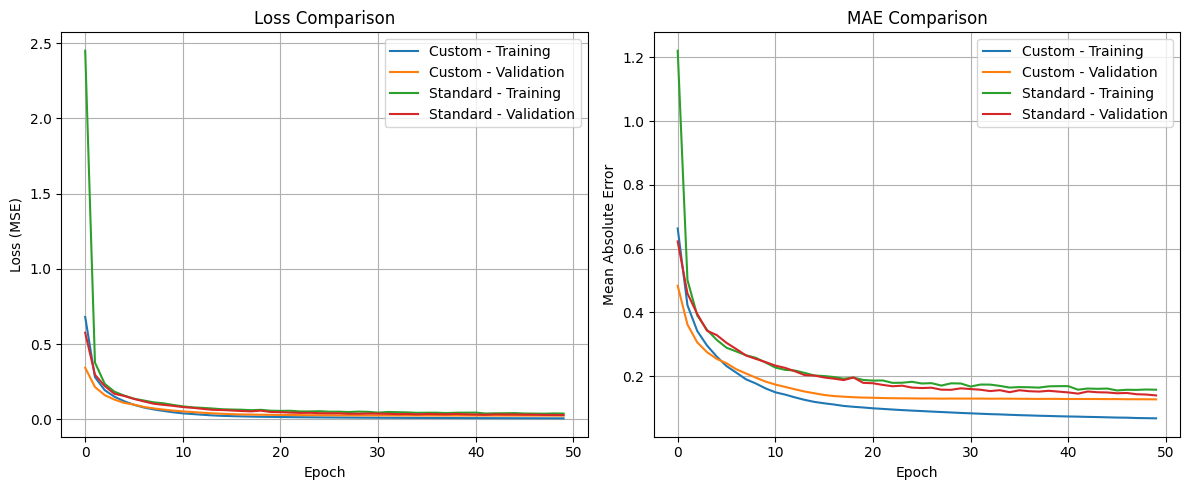

Learned noise standard deviation: 0.0012 (initial: 0.2)
Weight norms range: 0.3555 to 0.6899 (constraint: 1.5)


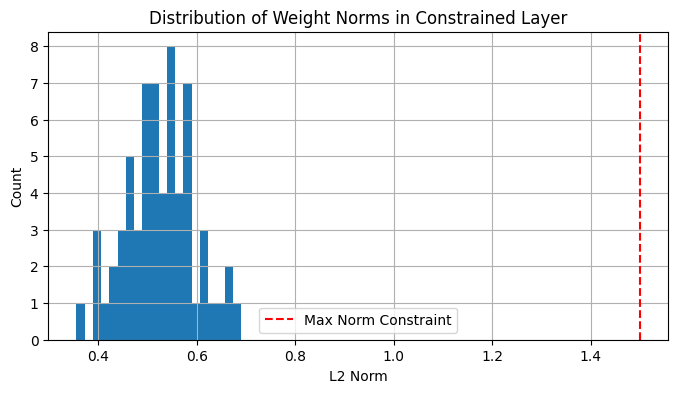

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow.keras.backend as K

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# 1. Custom Gaussian Noise Layer (trainable variance)
class AdaptiveGaussianNoise(layers.Layer):
    def __init__(self, initial_stddev=0.1, **kwargs):
        super(AdaptiveGaussianNoise, self).__init__(**kwargs)
        self.initial_stddev = initial_stddev

    def build(self, input_shape):
        # Create a trainable parameter for the noise standard deviation
        self.stddev = self.add_weight(
            name='stddev',
            shape=(),
            initializer=keras.initializers.Constant(self.initial_stddev),
            constraint=keras.constraints.NonNeg(),  # Ensure stddev is non-negative
            trainable=True
        )
        super(AdaptiveGaussianNoise, self).build(input_shape)

    def call(self, inputs, training=None):
        if training:
            # Add Gaussian noise during training
            return inputs + tf.random.normal(
                shape=tf.shape(inputs),
                mean=0.0,
                stddev=self.stddev,
                dtype=inputs.dtype
            )
        return inputs

    def compute_output_shape(self, input_shape):
        return input_shape

    def get_config(self):
        config = super(AdaptiveGaussianNoise, self).get_config()
        config.update({
            'initial_stddev': self.initial_stddev
        })
        return config

# 2. Exponential Layer
class ExponentialLayer(layers.Layer):
    def __init__(self, **kwargs):
        super(ExponentialLayer, self).__init__(**kwargs)

    def call(self, inputs):
        # Apply exponential function to inputs
        return K.exp(inputs)

    def compute_output_shape(self, input_shape):
        return input_shape

# 3. Custom Weight-Constrained Dense Layer
class ConstrainedDense(layers.Dense):
    def __init__(self, units, max_norm=1.0, **kwargs):
        self.max_norm = max_norm
        super(ConstrainedDense, self).__init__(units, **kwargs)

    def build(self, input_shape):
        # Add MaxNorm constraint to kernel weights
        self.kernel_constraint = keras.constraints.MaxNorm(max_value=self.max_norm)
        super(ConstrainedDense, self).build(input_shape)

    def get_config(self):
        config = super(ConstrainedDense, self).get_config()
        config.update({
            'max_norm': self.max_norm
        })
        return config

# Create a dataset
def generate_data(n_samples=1000):
    X = np.random.randn(n_samples, 10)
    # Create a non-linear relationship with noise
    y = np.sin(X[:, 0]) + 0.1 * X[:, 1]**2 + 0.5 * np.exp(X[:, 2] / 10) + np.random.randn(n_samples) * 0.1
    return X, y.reshape(-1, 1)

X_train, y_train = generate_data(1000)
X_val, y_val = generate_data(200)

# Model with custom layers
custom_layers_model = keras.Sequential([
    layers.Input(shape=(10,)),
    AdaptiveGaussianNoise(initial_stddev=0.2),
    ConstrainedDense(64, max_norm=1.5, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16),
    ExponentialLayer(),
    layers.Dense(1)
])

# Standard model for comparison
standard_model = keras.Sequential([
    layers.Input(shape=(10,)),
    layers.GaussianNoise(0.2),
    layers.Dense(64, activation='relu', kernel_constraint=keras.constraints.MaxNorm(1.5)),
    layers.Dense(32, activation='relu'),
    layers.Dense(16),
    layers.Activation('exponential'),
    layers.Dense(1)
])

# Compile both models
custom_layers_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

standard_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

# Print model summaries
print("Custom Layers Model:")
custom_layers_model.summary()

print("\nStandard Model:")
standard_model.summary()

# Train both models
history_custom = custom_layers_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=0
)

history_standard = standard_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val),
    verbose=0
)

# Plot training histories
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_custom.history['loss'], label='Custom - Training')
plt.plot(history_custom.history['val_loss'], label='Custom - Validation')
plt.plot(history_standard.history['loss'], label='Standard - Training')
plt.plot(history_standard.history['val_loss'], label='Standard - Validation')
plt.title('Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_custom.history['mae'], label='Custom - Training')
plt.plot(history_custom.history['val_mae'], label='Custom - Validation')
plt.plot(history_standard.history['mae'], label='Standard - Training')
plt.plot(history_standard.history['val_mae'], label='Standard - Validation')
plt.title('MAE Comparison')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Get the learned noise standard deviation
learned_stddev = custom_layers_model.layers[0].stddev.numpy()
print(f"Learned noise standard deviation: {learned_stddev:.4f} (initial: 0.2)")

# Check weight norms in the constrained layer
weights = custom_layers_model.layers[1].get_weights()[0]
weight_norms = np.sqrt(np.sum(weights**2, axis=0))
print(f"Weight norms range: {weight_norms.min():.4f} to {weight_norms.max():.4f} (constraint: 1.5)")

# Visualize the distribution of weight norms
plt.figure(figsize=(8, 4))
plt.hist(weight_norms, bins=20)
plt.axvline(x=1.5, color='r', linestyle='--', label='Max Norm Constraint')
plt.title('Distribution of Weight Norms in Constrained Layer')
plt.xlabel('L2 Norm')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()